# Explore here

In [311]:
# Imports
# Basics
import pandas as pd
import numpy as np

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Metricas
# METRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [312]:
# Carga de mis datos
data = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [313]:
# Informacion general de mis datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [314]:
# Variable a predecir
data["Churn"].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

In [315]:
# Busqueda de duplicados
data.duplicated().sum()

np.int64(0)

In [316]:
# Seleccion de atributos relevantes
# Features a eliminar: Por ahora solo "customerID"
data = data.drop("customerID", axis=1)

In [317]:
# ANÁLISIS DE VARIABLES CATEGÓRICAS
# cat_vars = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
#             "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", 
#             "PaymentMethod", "Churn"]

def graph_feature(feature):
    plt.figure(figsize=(4, 4))
    ax = sns.countplot(data = data, x = feature, palette='pastel', hue= feature, legend=False)
    # Añadir grid horizontal
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    # Mostrar los valores encima de cada barra
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., 
                p.get_height() + 0.5, 
                f'{int(p.get_height())}', 
                ha='center', 
                va='bottom')
    plt.xticks(rotation=45)
    # Ajustar el layout
    plt.tight_layout()
    # Mostrar el plot
    plt.show()

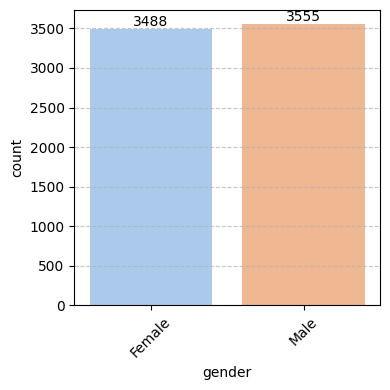

In [318]:
graph_feature("gender")

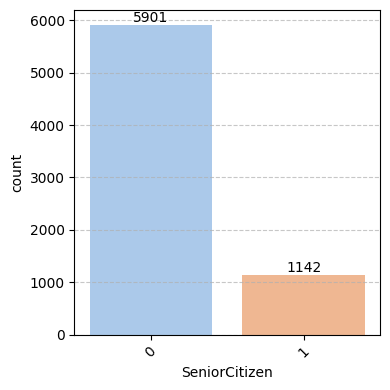

In [319]:
graph_feature("SeniorCitizen")

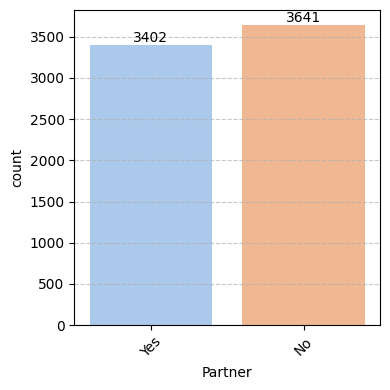

In [320]:
graph_feature("Partner")

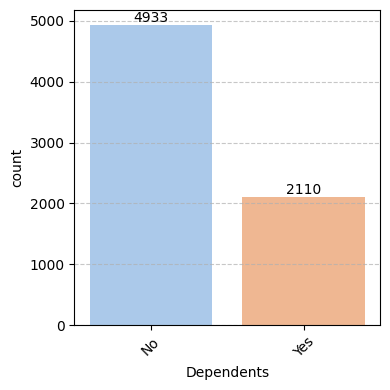

In [321]:
graph_feature("Dependents")

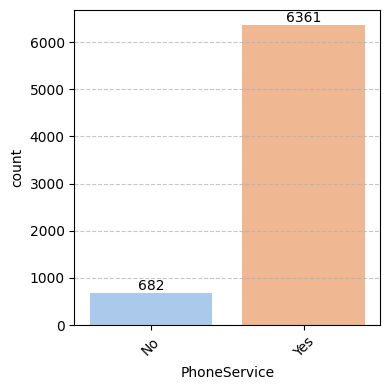

In [322]:
graph_feature("PhoneService")

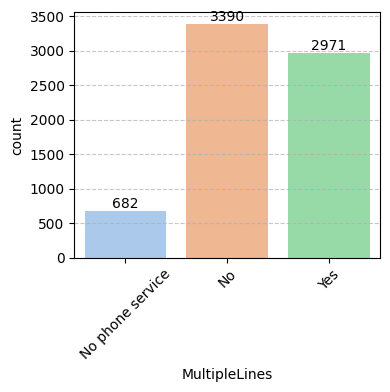

In [323]:
graph_feature("MultipleLines")

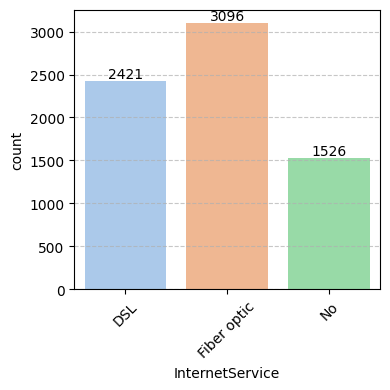

In [324]:
graph_feature("InternetService")

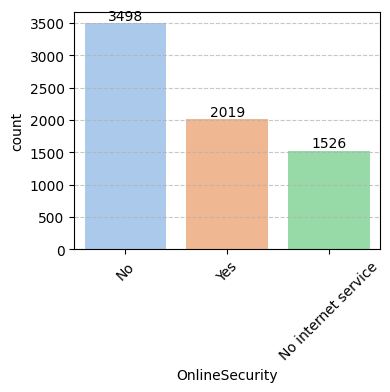

In [325]:
graph_feature("OnlineSecurity")

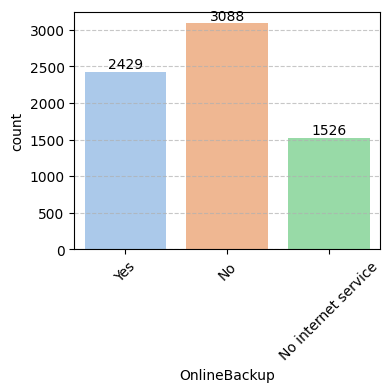

In [326]:
graph_feature("OnlineBackup")

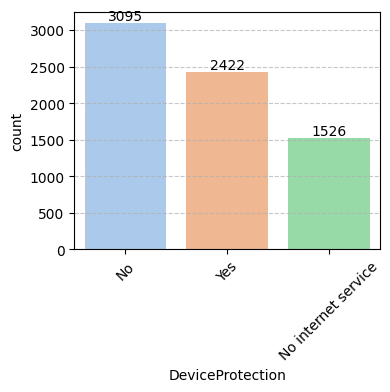

In [327]:
graph_feature("DeviceProtection")

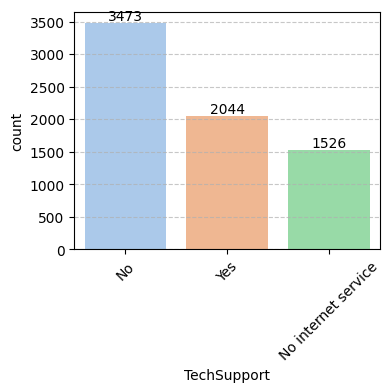

In [328]:
graph_feature("TechSupport")

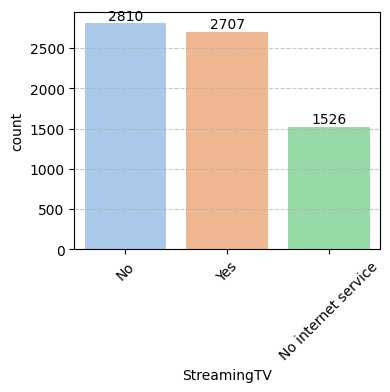

In [329]:
graph_feature("StreamingTV")

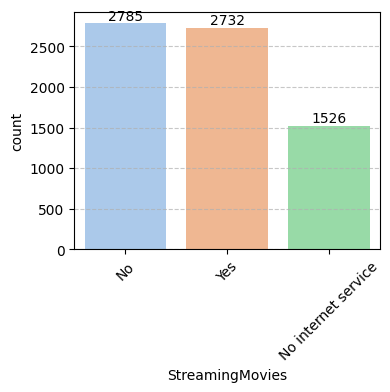

In [330]:
graph_feature("StreamingMovies")

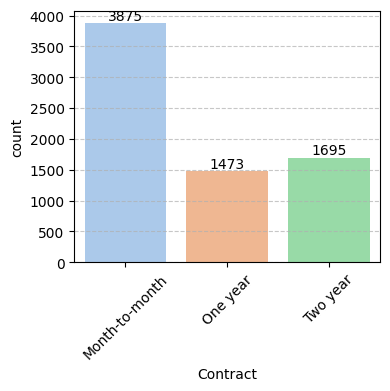

In [331]:
graph_feature("Contract")

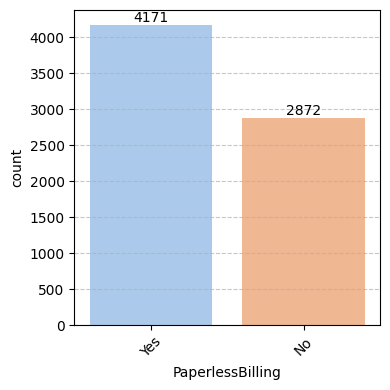

In [332]:
graph_feature("PaperlessBilling")

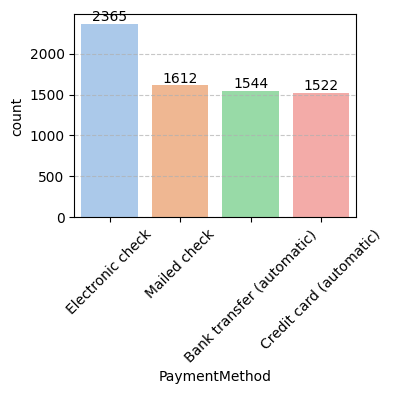

In [333]:
graph_feature("PaymentMethod")

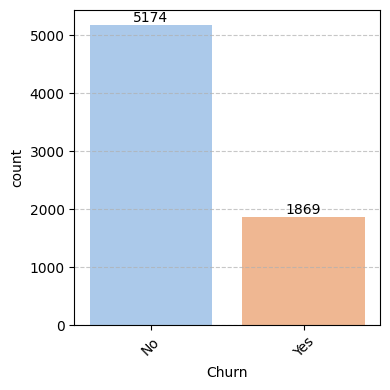

In [334]:
graph_feature("Churn")

In [335]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].dtype

dtype('float64')

In [336]:
data["TotalCharges"].isnull().sum()

np.int64(11)

In [337]:
data["TotalCharges"] = data["TotalCharges"].fillna(0)

In [338]:
data["TotalCharges"].isnull().sum()

np.int64(0)

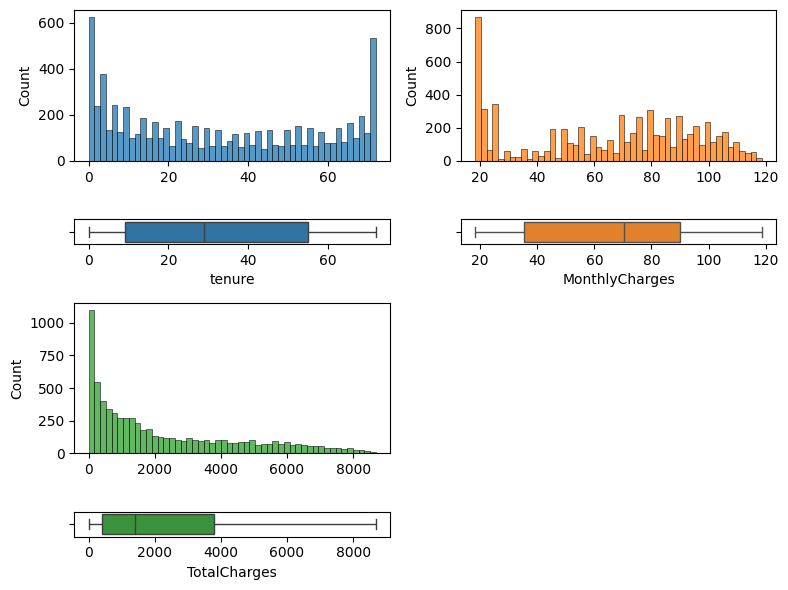

In [339]:
# ANALISIS DE VARIABLES NUMERICAS
# ["tenure", "MonthlyCharges", "TotalCharges"]
fig, axis = plt.subplots(4, 2, figsize = (8, 6), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# tenure
sns.histplot(ax = axis[0, 0], data = data, x = "tenure", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "tenure", color="#1f77b4").set(xlabel = "tenure")

# MonthlyCharges
sns.histplot(ax = axis[0, 1], data = data, x = "MonthlyCharges", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "MonthlyCharges", color="#ff7f0e").set(xlabel = "MonthlyCharges")

# TotalCharges
sns.histplot(ax = axis[2, 0], data = data, x = "TotalCharges", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "TotalCharges", color="#2ca02c").set(xlabel = "TotalCharges")

axis[2, 1].axis("off")
axis[3, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [340]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO

vars_to_num = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
               "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]

data_num = data.copy()

data_num = pd.get_dummies(data_num, columns=vars_to_num)
data_num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,No,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,No,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,No,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7041,1,4,74.40,306.60,Yes,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True


In [341]:
from sklearn.model_selection import train_test_split

X = data_num.drop("Churn", axis = 1)
y = data_num["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [342]:
# from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()
# selector = SelectFromModel(model, threshold=0.03)
# X_train_sel = selector.fit_transform(X_train, y_train)

In [250]:
# Variables seleccionadas
# selected_features = X_train.columns[selector.get_support()]
# print("Variables seleccionadas:", selected_features)

In [251]:
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

In [346]:
# modelo
model = RandomForestClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [347]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [348]:
# Metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.794889992902768
F1 score Test:  0.794889992902768
Precision Test:  0.794889992902768
Recall Test:  0.794889992902768
Accuracy Train:  0.9985800496982605
F1 score Train:  0.9985800496982605
Precision Train:  0.9985800496982605
Recall Train:  0.9985800496982605


In [350]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],  # Número de árboles (evita valores altos para reducir overfitting)
    'max_depth': [None, 10, 20],  # Profundidad máxima (None = ilimitado, limita para regularizar)
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo (aumentar reduce overfitting)
    'min_samples_leaf': [1, 2, 4],  # Mínimo de muestras en hojas (aumentar reduce overfitting)
    'max_features': ['sqrt', 'log2'],  # Número de features consideradas por split (evita "feature dominance")
    'bootstrap': [True],  # Muestreo con reemplazo (mejor generalización)
    'class_weight': [None, 'balanced']  # Útil si hay desbalance de clases
}

# Inicializa el modelo y GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Validación cruzada de 5 folds
    scoring='accuracy',  # Puedes usar 'f1', 'precision', etc. según tu necesidad
    n_jobs=-1,  # Usa todos los cores de tu CPU
    verbose=2
)

# Ajusta el modelo
grid_search.fit(X_train, y_train)

# Mejores parámetros y resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score (CV):", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, class_weight=None, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, class_weight=None, max_depth=None

In [408]:
# modelo
model = RandomForestClassifier(random_state = 42, bootstrap=True, class_weight=None, 
                               max_depth=10, max_features="log2", min_samples_leaf=2, 
                               min_samples_split=10, n_estimators=30)

# entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=30, random_state=42)

In [409]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [410]:
# Metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8161816891412349
F1 score Test:  0.8161816891412349
Precision Test:  0.8161816891412349
Recall Test:  0.8161816891412349
Accuracy Train:  0.8420305289314874
F1 score Train:  0.8420305289314874
Precision Train:  0.8420305289314874
Recall Train:  0.8420305289314874
